In [1]:
# Quick utility to embed the videos below
from IPython.display import YouTubeVideo
def embed_video(index, playlist='PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ'):
    return YouTubeVideo('', index=index - 1, list=playlist, width=600, height=350)

In [2]:
embed_video(1)

In [3]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessTpye=DOWNLOAD'

In [4]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x184cd451c88>)

In [5]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
01/31/2019 11:00:00 PM,7,6
01/31/2019 10:00:00 PM,13,16
01/31/2019 09:00:00 PM,18,27
01/31/2019 08:00:00 PM,32,33
01/31/2019 07:00:00 PM,40,94
01/31/2019 06:00:00 PM,68,246
01/31/2019 05:00:00 PM,106,399
01/31/2019 04:00:00 PM,84,219
01/31/2019 03:00:00 PM,60,97


In [6]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-31 23:00:00,7.0,6.0
2019-01-31 22:00:00,13.0,16.0
2019-01-31 21:00:00,18.0,27.0
2019-01-31 20:00:00,32.0,33.0
2019-01-31 19:00:00,40.0,94.0


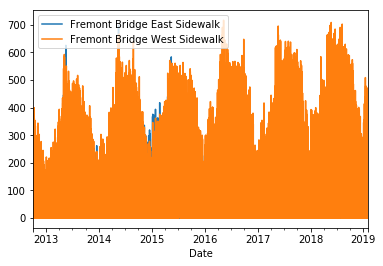

In [7]:
%matplotlib inline
data.plot()

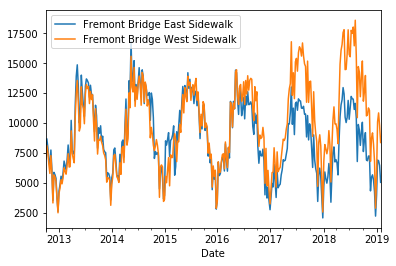

In [8]:
data.resample('W').sum().plot()

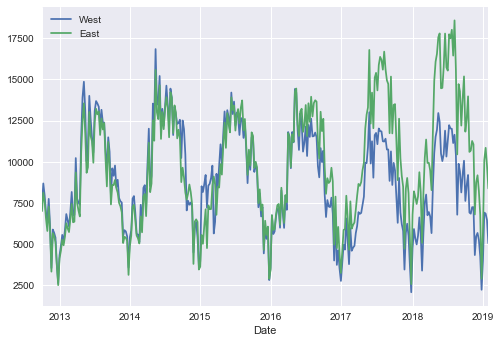

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ['West', 'East']
data.resample('W').sum().plot()

(0, 1098983.95)

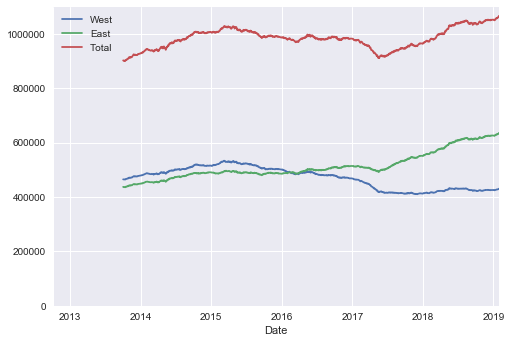

In [10]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

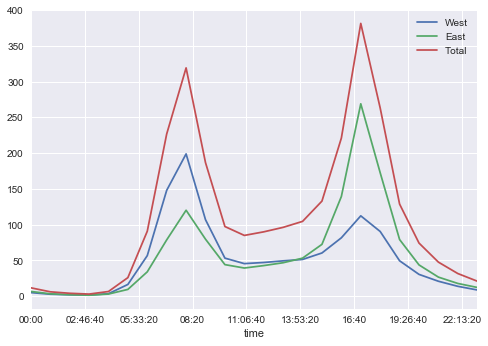

In [11]:
data.groupby(data.index.time).mean().plot()

In [12]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


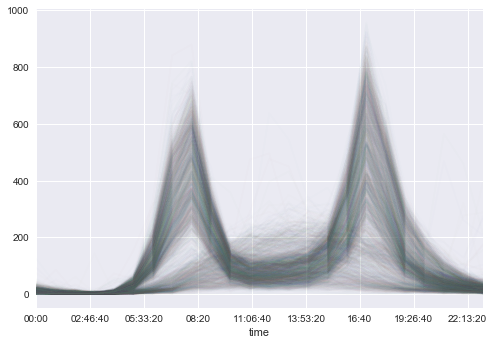

In [13]:
pivoted.plot(legend=False, alpha = 0.01);